# Pymaceuticals Inc.
---

### Analysis
Ketapril has the largest tumor vol according to the cleaned-up data frame shown in number 7.

The test mouse population was pretty split between males and females with males have a bit more test subjects at 50.2%.

Capomulin and Ramicane were used the most in these trials compared to all the other treatments.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')

# Display the data table for preview
results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = mouse_metadata ["Mouse ID"].nunique
total_mice

<bound method IndexOpsMixin.nunique of 0      k403
1      s185
2      x401
3      m601
4      g791
       ... 
244    z314
245    z435
246    z581
247    z795
248    z969
Name: Mouse ID, Length: 249, dtype: object>

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ID = results_df.loc[results_df.duplicated(subset = ['Timepoint','Mouse ID']), 'Mouse ID'].unique()
dup_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df= results_df.loc[results_df["Mouse ID"]=="g989",:]

g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = results_df[results_df['Mouse ID'].isin(dup_mouse_ID)==False]

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_df ["Mouse ID"].nunique()

clean_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean= clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
med = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
var = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
stdev = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
sem = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()

df1=mean.merge(med, how='left', on='Drug Regimen')
df2=var.merge(stdev, how='left', on='Drug Regimen')
df3=df1.merge(sem, how='left', on='Drug Regimen')
summary=df2.merge(df3, how='left', on='Drug Regimen')

summary

,Tumor Volume (mm3)_x_x,Tumor Volume (mm3)_y_x,Tumor Volume (mm3)_x_y,Tumor Volume (mm3)_y_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,24.947764,4.994774,40.675741,41.557809,0.329346
Ceftamin,39.290177,6.268188,52.591172,51.776157,0.469821
Infubinol,43.128684,6.567243,52.884795,51.820584,0.492236
Ketapril,68.553577,8.279709,55.235638,53.698743,0.603860
Naftisol,66.173479,8.134708,54.331565,52.509285,0.596466
Placebo,61.168083,7.821003,54.033581,52.288934,0.581331
Propriva,43.852013,6.622085,52.320930,50.446266,0.544332
Ramicane,23.486704,4.846308,40.216745,40.673236,0.320955
Stelasyn,59.450562,7.710419,54.233149,52.431737,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_2= clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].aggregate(["mean","median","var","std","sem"])
summary_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

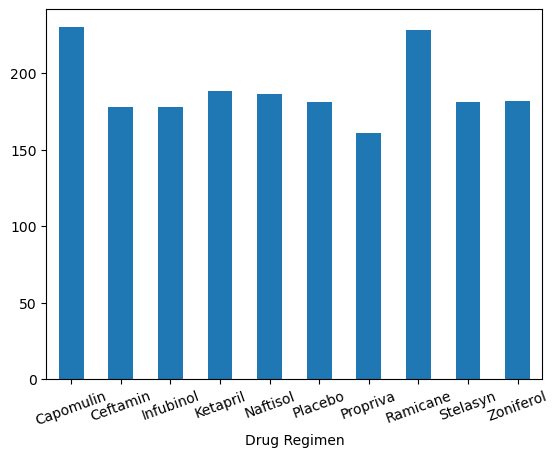

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mice = results_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

mice_chart = count_mice.plot.bar(x='Druge Regimne', y="mouse ID",rot = 20)



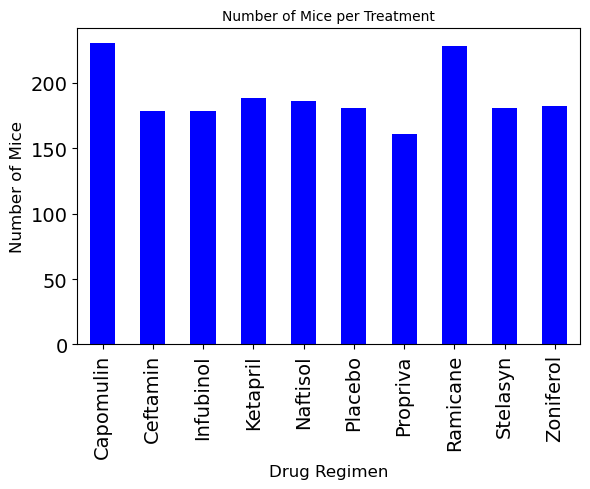

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_mice = results_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pandas = count_mice.plot.bar(figsize=(6,5), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment",fontsize = 10)

plt.tight_layout()
plt.show()

In [11]:
gender = results_df.groupby(["Mouse ID","Sex"])

gender_df = pd.DataFrame(gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


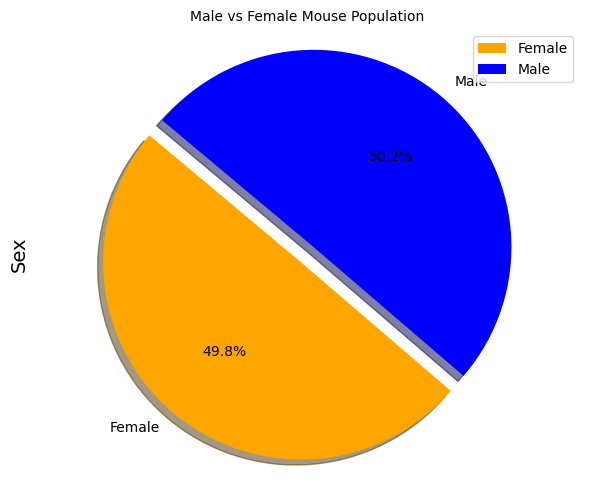

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['orange', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(6,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 10)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

plt.tight_layout()
plt.show()

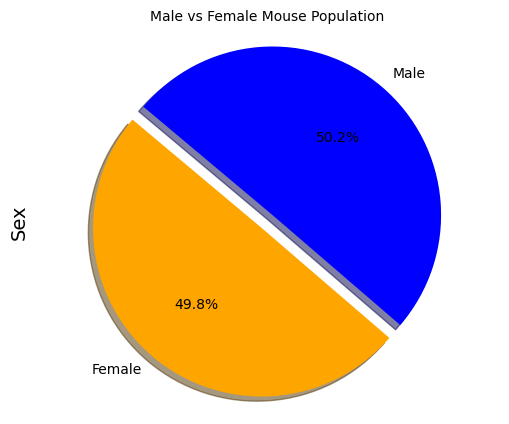

In [13]:
labels = ["Female","Male"]

sizes = [49.799197,50.200803]

colors = ['orange', 'blue']

explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(6, 5))

plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)

plt.title('Male vs Female Mouse Population',fontsize = 10)

plt.ylabel('Sex',fontsize = 14)

plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(clean_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

for drug in drugs:
    drug_data = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
# Determine outliers using upper and lower bounds

    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    tumor_vol[drug] = {
        'Tumor Volume Data': drug_data,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers}
        
    
    print(f"--- {drug} ---")
    print(f"IQR for {drug}: {iqr}")
    print(f"Lower Bound for {drug}: {lower_bound}")
    print(f"Upper Bound for {drug}: {upper_bound}")
    print(f"Potential outliers for {drug}:")
    print(outliers)


--- Capomulin ---
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Potential outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
--- Ramicane ---
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Potential outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
--- Infubinol ---
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Potential outliers for Infubinol:
58    36.321346
Name: Tumor Volume (mm3), dtype: float64
--- Ceftamin ---
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


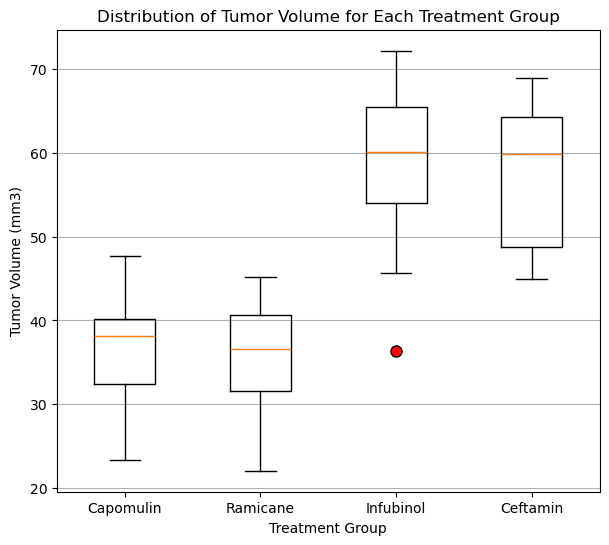

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [tumor_vol[drug]['Tumor Volume Data'] for drug in drugs]

plt.figure(figsize=(7, 6))
plt.boxplot(data, labels=drugs, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.show()

plt.show()

## Line and Scatter Plots

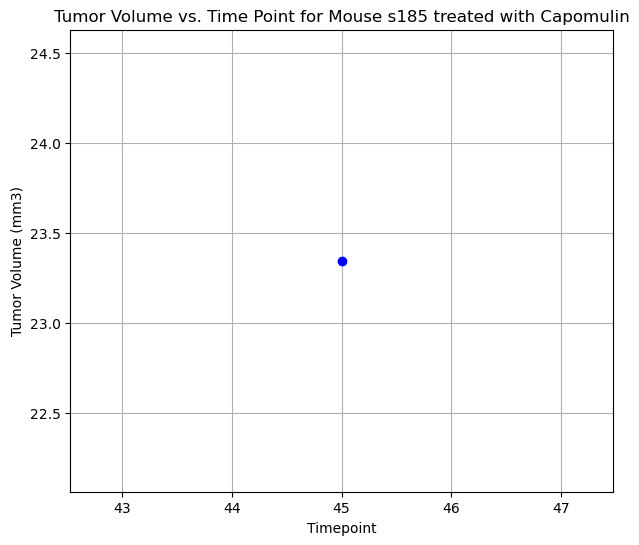

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'  

mouse_data = merged_df[(merged_df['Mouse ID'] == mouse_id) & (merged_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(7, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

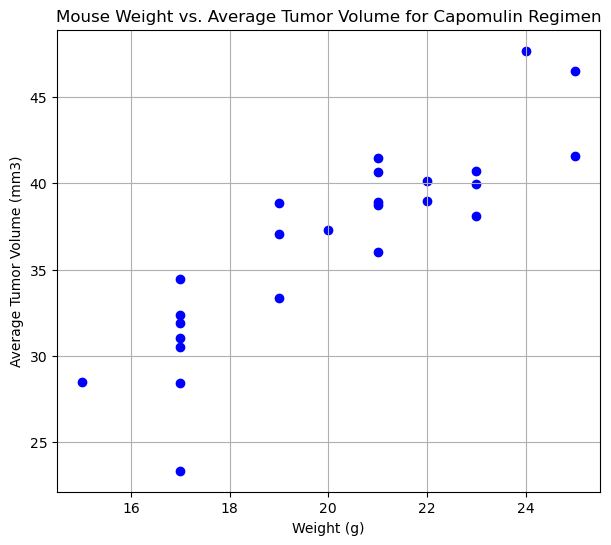

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(7, 6))
plt.scatter(avg_weight, avg_tumor_vol, color='b', marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

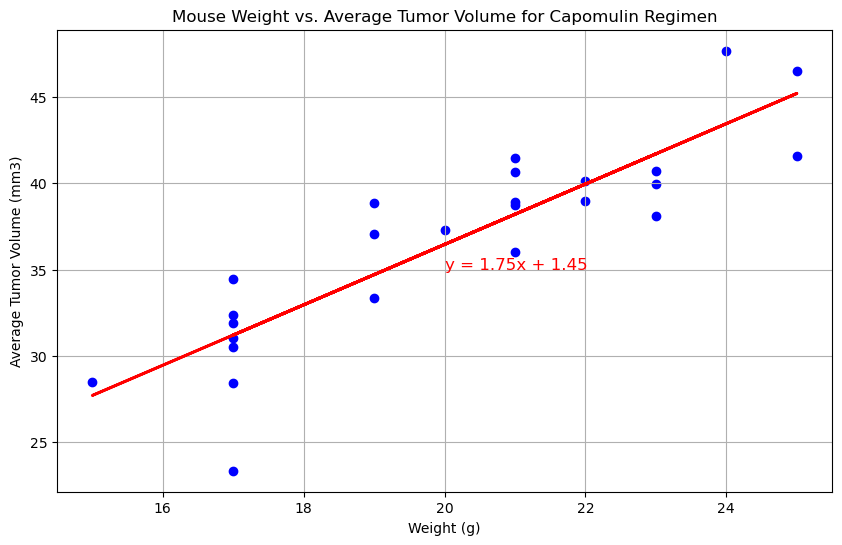

Correlation coefficient: 0.876706040365812
R-squared value: 0.7686134812139006


In [40]:
# Calculate the correlation coefficient and a linear regression model 
from scipy.stats import linregress

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = merged_df[merged_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()


correlation = avg_weight.corr(avg_tumor_vol)
slope, intercept, rvalue, pvalue, stderr = linregress(avg_weight, avg_tumor_vol)

regress_values = avg_weight * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.figure(figsize=(10, 6))
plt.scatter(avg_weight, avg_tumor_vol, color='b', marker='o')
plt.plot(avg_weight, regress_values, color='r', linestyle='-', linewidth=2)
plt.annotate(line_eq, (20, 35), fontsize=12, color='r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

print(f"Correlation coefficient: {correlation}")
print(f"R-squared value: {rvalue**2}")
